In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [2]:
dataset = pd.read_csv("kidney_disease.csv")

In [3]:
print(dataset.isnull().sum())

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [4]:
def quanQual(dataset):
    quan = []
    qual = []
    for columnName in dataset.columns:
        if dataset[columnName].dtype.kind in 'biufc':  
            quan.append(columnName)
        else:
            qual.append(columnName)
    return quan, qual

In [5]:
quan, qual = quanQual(dataset)

In [6]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(dataset[quan])
dataset[quan] = imp.transform(dataset[quan])


In [7]:
print(dataset[quan])

        id   age    bp     sg   al   su         bgr    bu   sc         sod  \
0      0.0  48.0  80.0  1.020  1.0  0.0  121.000000  36.0  1.2  137.528754   
1      1.0   7.0  50.0  1.020  4.0  0.0  148.036517  18.0  0.8  137.528754   
2      2.0  62.0  80.0  1.010  2.0  3.0  423.000000  53.0  1.8  137.528754   
3      3.0  48.0  70.0  1.005  4.0  0.0  117.000000  56.0  3.8  111.000000   
4      4.0  51.0  80.0  1.010  2.0  0.0  106.000000  26.0  1.4  137.528754   
..     ...   ...   ...    ...  ...  ...         ...   ...  ...         ...   
395  395.0  55.0  80.0  1.020  0.0  0.0  140.000000  49.0  0.5  150.000000   
396  396.0  42.0  70.0  1.025  0.0  0.0   75.000000  31.0  1.2  141.000000   
397  397.0  12.0  80.0  1.020  0.0  0.0  100.000000  26.0  0.6  137.000000   
398  398.0  17.0  60.0  1.025  0.0  0.0  114.000000  50.0  1.0  135.000000   
399  399.0  58.0  80.0  1.025  0.0  0.0  131.000000  18.0  1.1  141.000000   

          pot  hemo  
0    4.627244  15.4  
1    4.627244  11.3

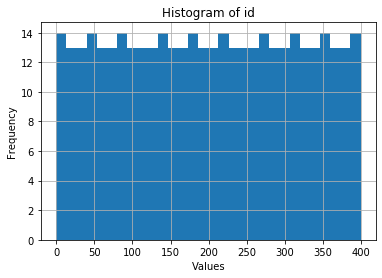

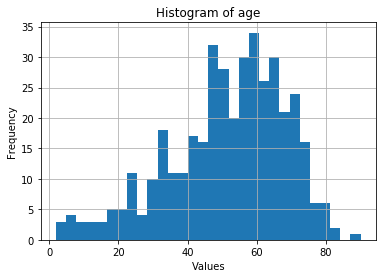

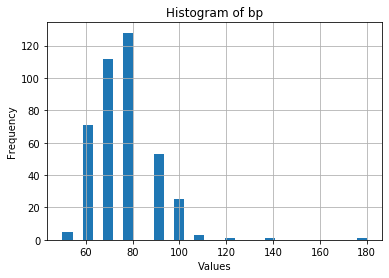

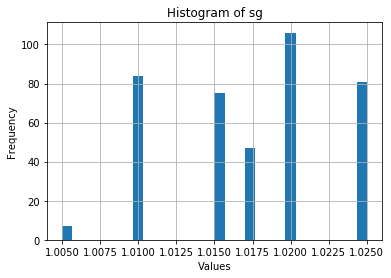

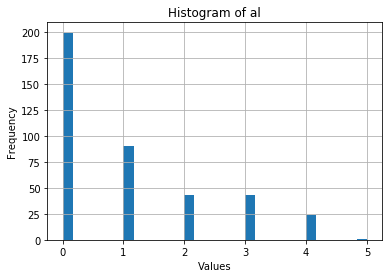

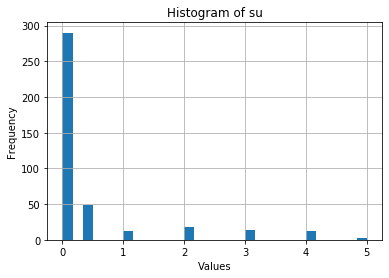

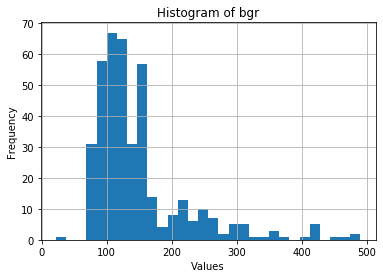

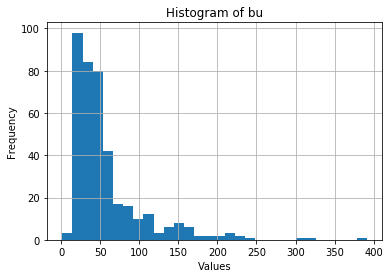

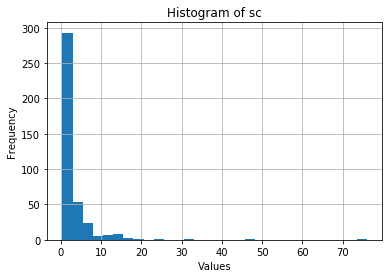

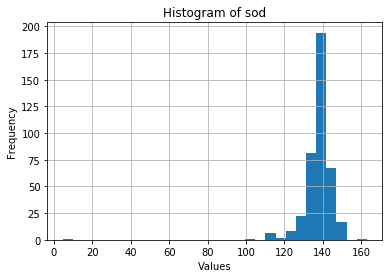

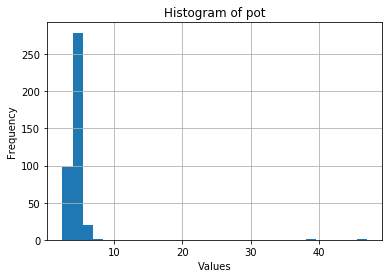

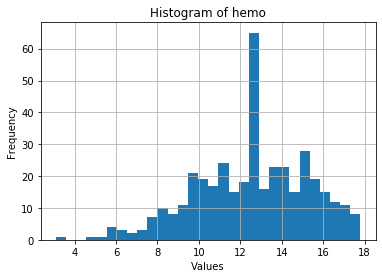

In [8]:
for column in quan:
    plt.figure()
    dataset[column].hist(bins=30)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

In [9]:
for column in quan:
    skewness = skew(dataset[column])
    kurt = kurtosis(dataset[column])
    print(f'{column} - Skewness: {skewness}, Kurtosis: {kurt}')

id - Skewness: 0.0, Kurtosis: -1.2000150000937506
age - Skewness: -0.6733109190469555, Kurtosis: 0.11181316360188598
bp - Skewness: 1.6237575531596693, Kurtosis: 8.875931506205182
sg - Skewness: -0.1827841507780465, Kurtosis: -0.8981996763977205
al - Skewness: 1.0565279887072512, Kurtosis: -0.05636662005280346
su - Skewness: 2.6193958368804546, Kurtosis: 6.078718740969077
bgr - Skewness: 2.1224240857825074, Kurtosis: 5.033338838633124
bu - Skewness: 2.6886231806774763, Kurtosis: 9.816157477694615
sc - Skewness: 7.6443004785698125, Kurtosis: 81.86390919364806
sod - Skewness: -7.87143374665551, Kurtosis: 108.38018562832235
pot - Skewness: 13.051976739270389, Kurtosis: 180.60668957680264
hemo - Skewness: -0.3577088170020545, Kurtosis: -0.10556810595379673
